In [1]:
import pandas as pd
import numpy as np
import pickle

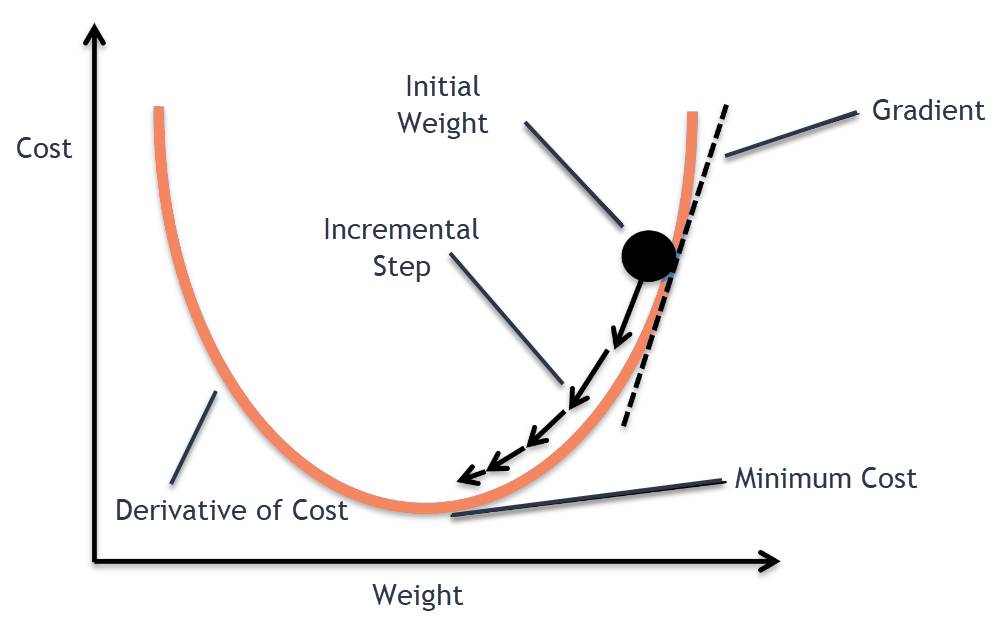


Stochastic gradient descent (often abbreviated SGD) is an iterative method for optimizing an objective function with suitable smoothness properties (e.g. differentiable or subdifferentiable). It can be regarded as a stochastic approximation of gradient descent optimization, since it replaces the actual gradient (calculated from the entire data set) by an estimate thereof (calculated from a randomly selected subset of the data).

Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. Even though SGD has been around in the machine learning community for a long time, it has received a considerable amount of attention just recently in the context of large-scale learning.

SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing. Given that the data is sparse, the classifiers in this module easily scale to problems with more than 10^5 training examples and more than 10^5 features.

Strictly speaking, SGD is merely an optimization technique and does not correspond to a specific family of machine learning models. It is only a way to train a model. Often, an instance of SGDClassifier or SGDRegressor will have an equivalent estimator in the scikit-learn API, potentially using a different optimization technique. For example, using SGDClassifier(loss='log') results in logistic regression, i.e. a model equivalent to LogisticRegression which is fitted via SGD instead of being fitted by one of the other solvers in LogisticRegression. Similarly, SGDRegressor(loss='squared_error', penalty='l2') and Ridge solve the same optimization problem, via different means.


The advantages of Stochastic Gradient Descent are:

1. Efficiency.

2. Ease of implementation (lots of opportunities for code tuning).

3. The disadvantages of Stochastic Gradient Descent include:

4. SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.

5. SGD is sensitive to feature scaling.

In [2]:
with open('digits.txt','rb') as f:
    data = pickle.load(f)
X = data['data']
y = data['target']
dim = 8

In [3]:
X[0].reshape((dim,dim)), y[0]

(array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
        [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
        [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
        [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
        [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
        [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
        [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
        [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]]),
 0)

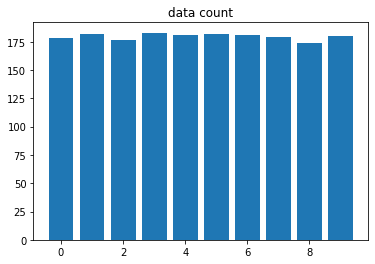

In [4]:
import matplotlib.pyplot as plt
num_count = pd.value_counts(y).sort_index()
plt.bar(list(num_count.index),list(num_count.values))
plt.title('data count')
plt.show()

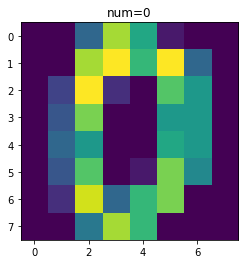

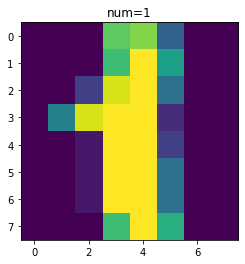

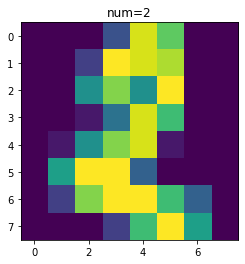

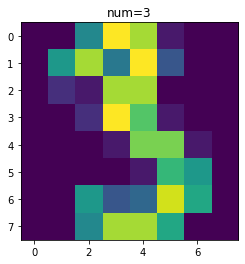

In [5]:
import matplotlib.pyplot as plt
for i in range(4):
    plt.imshow(X[i].reshape((dim,dim)))
    plt.title('num=%s'%y[i])
    plt.show()


In [6]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

class mySGD:
    def __init__(self):
        '''
        buildmodel
        '''
        self.clf = make_pipeline(
            StandardScaler(),
            SGDClassifier(loss='hinge',learning_rate='optimal'),
        )


    def train(self, X, y):
        '''
        train
        :param X:
        :param y:
        :return:
        '''
        self.clf = self.clf.fit(X, y)
        return self.clf

    def predict(self, X):
        '''
        predict
        :param X:
        :return:
        '''
        return self.clf.predict(X)
    
    def predict_prob(self, X):
        '''
        predict prob
        '''
        return self.clf.predict_proba(X)

In [7]:
def eval_result(y, pre_y):
    '''
    eval
    :param y:
    :param pre_y:
    :return:
    '''
    lables = list(set(y))
    result = dict()
    for l in lables:
        t_r = dict()
        TP = np.logical_and(y==pre_y, y==l).sum()
        FP = np.logical_and(y!=pre_y, y!=l).sum()
        FN = np.logical_and(y!=pre_y, y==l).sum()
        t_r['precision'] = TP/(TP+FP)
        t_r['recall'] = TP/(TP+FN)
        t_r['F1'] = 2*t_r['precision']*t_r['recall']/(t_r['precision']+t_r['recall'])

        result[l] = t_r
    return result

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

In [9]:
model = mySGD()
model.train(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [10]:
pre_y_train = model.predict(X_train)
eval_train = eval_result(y_train, pre_y_train)
eval_train

{0: {'precision': 0.8766233766233766, 'recall': 1.0, 'F1': 0.9342560553633218},
 1: {'precision': 0.9210526315789473,
  'recall': 0.9523809523809523,
  'F1': 0.9364548494983277},
 2: {'precision': 0.8910256410256411,
  'recall': 0.9858156028368794,
  'F1': 0.936026936026936},
 3: {'precision': 0.8867924528301887,
  'recall': 0.9929577464788732,
  'F1': 0.9368770764119602},
 4: {'precision': 0.8875,
  'recall': 0.993006993006993,
  'F1': 0.9372937293729372},
 5: {'precision': 0.8888888888888888, 'recall': 1.0, 'F1': 0.9411764705882353},
 6: {'precision': 0.8881987577639752,
  'recall': 0.9930555555555556,
  'F1': 0.9377049180327869},
 7: {'precision': 0.8867924528301887,
  'recall': 0.9929577464788732,
  'F1': 0.9368770764119602},
 8: {'precision': 0.9038461538461539,
  'recall': 0.9724137931034482,
  'F1': 0.9368770764119602},
 9: {'precision': 0.8944099378881988,
  'recall': 0.9863013698630136,
  'F1': 0.9381107491856677}}

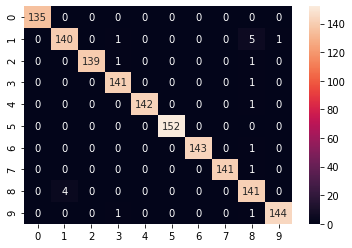

In [11]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def confusion_matrix(y_true, y_pred, labels=None, save_path = './confusion_matrix.jpg'):
    n = len(labels)
    labels_dict = {label: i for i, label in enumerate(labels)}
    res = np.zeros([n, n], dtype=np.int32)
    for gold, predict in zip(y_true, y_pred):
        res[labels_dict[gold]][labels_dict[predict]] += 1

    df = pd.DataFrame(res, index=labels, columns=labels)
    sns.heatmap(df, annot=True, fmt='d')
    plt.savefig(save_path)
    plt.show()

confusion_matrix(y_train, pre_y_train, list(range(10)), save_path='./train_confusion_matrix.jpg')

In [12]:
pre_y_test = model.predict(X_test)
eval_test = eval_result(y_test, pre_y_test)
eval_test

{0: {'precision': 0.711864406779661,
  'recall': 0.9767441860465116,
  'F1': 0.823529411764706},
 1: {'precision': 0.673469387755102,
  'recall': 0.9428571428571428,
  'F1': 0.7857142857142857},
 2: {'precision': 0.6875,
  'recall': 0.9166666666666666,
  'F1': 0.7857142857142857},
 3: {'precision': 0.7090909090909091,
  'recall': 0.9512195121951219,
  'F1': 0.8125},
 4: {'precision': 0.6785714285714286, 'recall': 1.0, 'F1': 0.8085106382978724},
 5: {'precision': 0.6428571428571429, 'recall': 0.9, 'F1': 0.75},
 6: {'precision': 0.6727272727272727, 'recall': 1.0, 'F1': 0.8043478260869564},
 7: {'precision': 0.7111111111111111,
  'recall': 0.8648648648648649,
  'F1': 0.7804878048780488},
 8: {'precision': 0.6222222222222222,
  'recall': 0.9655172413793104,
  'F1': 0.7567567567567567},
 9: {'precision': 0.66,
  'recall': 0.9705882352941176,
  'F1': 0.7857142857142857}}

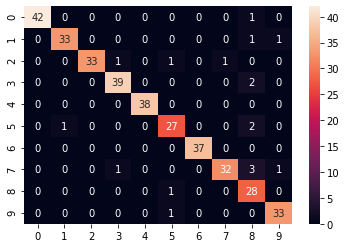

In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

def confusion_matrix(y_true, y_pred, labels=None, save_path = './confusion_matrix.jpg'):
    n = len(labels)
    labels_dict = {label: i for i, label in enumerate(labels)}
    res = np.zeros([n, n], dtype=np.int32)
    for gold, predict in zip(y_true, y_pred):
        res[labels_dict[gold]][labels_dict[predict]] += 1

    df = pd.DataFrame(res, index=labels, columns=labels)
    sns.heatmap(df, annot=True, fmt='d')
    plt.savefig(save_path)
    plt.show()

confusion_matrix(y_test, pre_y_test, list(range(10)), save_path='./test_confusion_matrix.jpg')

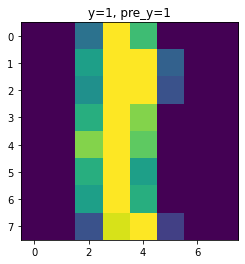

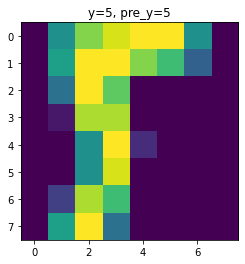

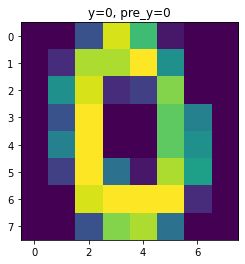

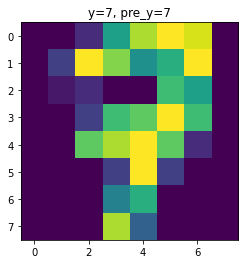

In [14]:
for i in range(4):
    plt.imshow(X_test[i].reshape((dim,dim)))
    plt.title('y=%s, pre_y=%s'%(y_test[i], pre_y_test[i]))
    plt.show()